In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
from matplotlib.pyplot import imshow

In [6]:
import rawpy
import numpy as np

uint8 (3040, 4056, 3)


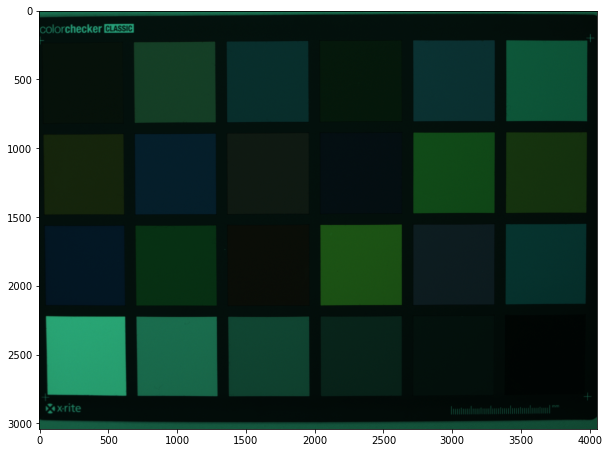

In [3]:
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
array = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1,1),
                        user_wb=[1.0,1.0,1.0,1.0], no_auto_bright=True)
imshow(array)
print(array.dtype, array.shape)

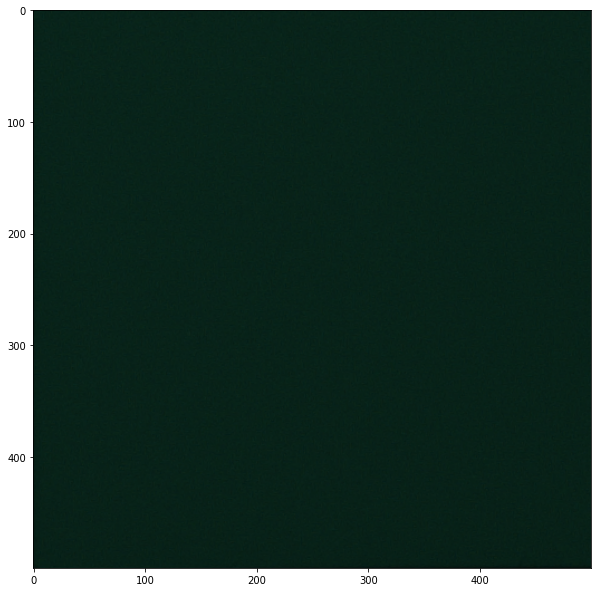

In [4]:
array_crop = array[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop)

In [25]:
r_median = np.median(array_crop[:,:,0])
g_median = np.median(array_crop[:,:,1])
b_median = np.median(array_crop[:,:,2])
print(r_median, g_median, b_median)

8.0 34.0 25.0


In [26]:
base_wb = [g_median/r_median, 1.0, g_median/b_median, 1.0]
print(base_wb)

[4.25, 1.0, 1.36, 1.0]


In [27]:
base_brightness = 255/g_median
print(base_brightness)

7.5


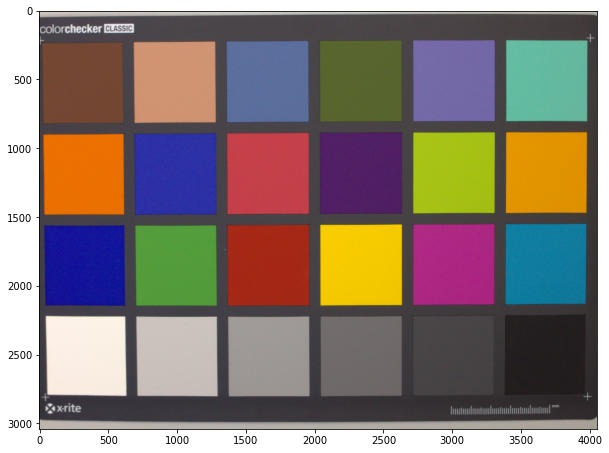

In [28]:
array_corr = raw.postprocess(user_wb=base_wb)
imshow(array_corr)

112.0 106.0 106.0


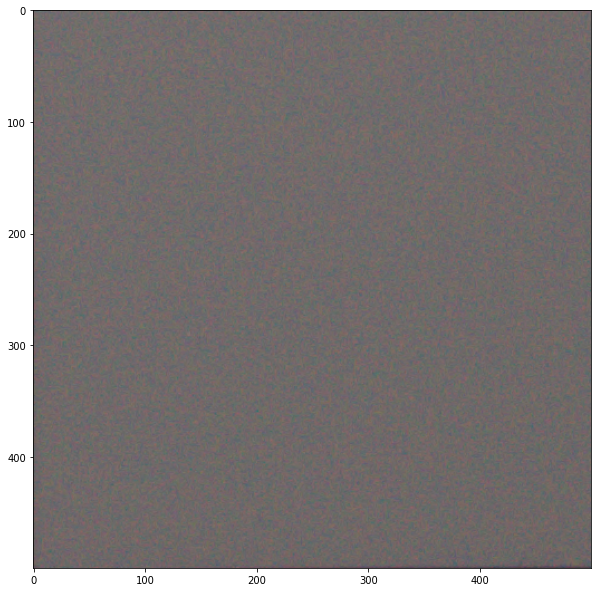

In [29]:
array_crop_corr = array_corr[2300:2800, 2050:2550] # grey field #D4
# field 4 last line [y1:y2,x1:x2] 500x500
imshow(array_crop_corr)

# calculate RGB for on cropped and corrected grey field
r_median_cc = np.median(array_crop_corr[:,:,0])
g_median_cc = np.median(array_crop_corr[:,:,1])
b_median_cc = np.median(array_crop_corr[:,:,2])
print(r_median_cc, g_median_cc, b_median_cc)
# target values [R=122,G=122,B=121]

In [23]:
rgb = rgb.astype(int)
print(rgb.dtype, rgb.shape)

int32 (3040, 4056, 3)


In [24]:
rgb

array([[[194, 198, 199],
        [192, 201, 198],
        [197, 197, 199],
        ...,
        [201, 185, 166],
        [194, 189, 163],
        [185, 197, 161]],

       [[195, 196, 198],
        [193, 200, 197],
        [197, 197, 198],
        ...,
        [200, 182, 171],
        [195, 180, 173],
        [187, 185, 172]],

       [[204, 200, 193],
        [202, 205, 193],
        [202, 202, 194],
        ...,
        [187, 182, 176],
        [185, 180, 180],
        [185, 178, 181]],

       ...,

       [[184, 183, 176],
        [185, 184, 173],
        [192, 179, 170],
        ...,
        [173, 165, 150],
        [166, 162, 153],
        [160, 158, 155]],

       [[183, 186, 173],
        [182, 191, 169],
        [193, 182, 169],
        ...,
        [167, 169, 151],
        [164, 161, 153],
        [159, 157, 155]],

       [[183, 183, 174],
        [184, 183, 172],
        [199, 172, 171],
        ...,
        [166, 160, 154],
        [163, 156, 155],
        [159, 157, 155]]